## Домашнее задание «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

In [2]:
import numpy as np
import pandas as pd
import scipy.stats

# Задания для самостоятельного решения


### 0. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [3]:
# достаточно подставить заданные значения в известную формулу

sigma = 225**0.5  
Z = 1.96            #при уровне доверия 0,95  
delta = 3 

N = ((sigma*Z)/delta)**2

# округлим до ближайшего большего целого
print(f'минимальный объем выборки составляет {np.ceil(N)}')

минимальный объем выборки составляет 97.0


### № 1 Пусть для выборки объема n = 25 вычислено среднее x¯ = 130. Из предыдущих исследований известно стандартное отклонение σ = 12. Постройте 98% доверительный интервал для среднего значения. 


In [4]:
# объем выборки сравнительно мал (меньше 30), поэтому для расчета будем использовать квантиль t-распределения уровня
# 1 - 0,02/2 c кол-вом степеней свободы = 24
sigma = 12
x_mean = 130
n = 25
t_a = 2.492

delta = (sigma/(n**0.5)) * t_a
print(f'Доверительный интервал ({x_mean - delta}, {x_mean + delta})')

Доверительный интервал (124.0192, 135.9808)


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

**Гипотеза Н0**: средний рост мужчин и женщин в двух выборках одинаковый  
**Гипотеза Н1**: средний рост мужчин и женщин в двух выборках различается

Это 2 независимые выборки. Воспользуемся 2-сторонним t-тестом Стьюдента 


In [5]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

alpha = 0.001
result = stats.ttest_ind(population_men, population_women, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средний рост различен')
else:
    print('Не отвергаем нулевую гипотезу')


Ttest_indResult(statistic=0.3692279044831581, pvalue=0.7119643584012849)
Не отвергаем нулевую гипотезу


Значение p-value больше заданного уровня значимости, т.е. мы не попали в критическую область и не можем отвергнуть нулевую гипотезу. Мы не можем сказать, что на этом уровне значимости средний рост мужчин и женщин различается (подтвердить альтернативную гипотезу)

In [6]:
import seaborn as sns

<AxesSubplot:>

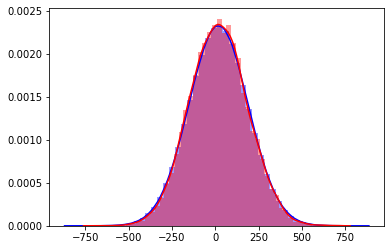

In [7]:
# На графике видно, что 2 распределения действительно близки друг к другу и их средние примерно на одном уровне
sns.distplot(population_men, color='blue')
sns.distplot(population_women, color='red')


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [8]:
sigma = 150
delta = 50
Z = 1.96  # 95% Квантиль нормального распределения. 

N = ((sigma*Z)/delta)**2

print(f'минимальный объем выборки составляет {np.ceil(N)}')


минимальный объем выборки составляет 35.0


### 4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [9]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


Сформулируем гипотезы.  
**Гипотеза Н0**: случайные события - ответы и погодные факты - независимы (не предсказывает погоду)  
**Гипотеза Н1**: ответы и погодные факты зависимы (предсказывает)


In [10]:
# import scipy as sp
# oddsratio, pvalue = sp.stats.fisher_exact('Тут должна быть ваша таблица')  # Возможно вам пригодится эта функция.

oddsratio, pvalue = stats.fisher_exact(observations)

print('На уровне значимости 0,05')
if pvalue > 0.05:
    print(f'ответы и погодные факты независимы (не предсказывает погоду), p-value = {round(pvalue, 4)}')
else:
    print(f'ответы и погодные факты зависимы (предсказывает), p-value = {round(pvalue, 4)}')

На уровне значимости 0,05
ответы и погодные факты независимы (не предсказывает погоду), p-value = 0.3542


Мы не попали в критическую область, нельзя отвергнуть нулевую гипотезу о том, что ответы и погодные факты независимы. Т.е. нельзя утверждать, что человек предсказывает погоду. 

### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: 
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [11]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [12]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

result = mean_confidence_interval(data, 0.9)
print(f'Доверительный интервал для data: {(result[0], result[2])}')

Доверительный интервал для data: (6.074074746111319, 7.183068111031539)


### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [13]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


Это 2 независимые выборки. Для оценки принадлежности к 1му множеству подойдет 2-сторонний t-тест Стьюдента  
**Гипотеза Н0**: средние 2х выборок статистически не различаются  
**Гипотеза Н1**: средние 2х выборок статистически различаются

In [14]:
alpha = 0.05 # возьмем принятый уровень значимости
result = stats.ttest_ind(data_1, data_2, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средние выборок различны => они не принадлежат 1му множеству')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)
Отвергаем нулевую гипотезу, средние выборок различны => они не принадлежат 1му множеству


<AxesSubplot:>

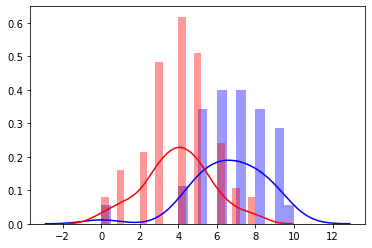

In [15]:
# визуализация подкрепляет наш вывод. Распределения 2х выборок не одинаковы
sns.distplot(data_1, bins=20, color='blue')
sns.distplot(data_2, bins=20, color='red')

### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

##### Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


##### Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Если следовать формальной логике, то получается следующее. Если мы изначально возьмем стандартный уровень значимости = 0.05, а тест показал 0.03, значит мы попадаем в критическую область и, следовательно, можем отвергнуть нулевую гипотезу о том, что распределение нормальное.  
Если изначально заданный уровень значимости более строгий, например = 0.01, то мы попадаем в доверительную область, и не можем ни принять альтернативную гипотезу, ни отвергнуть нулевую. При таком уровне значимости мы не можем утверждать, что распределение является или не является нормальным

### 8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

#### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

#### b) При каком минимальном P-values различия были бы уже значимы? 

In [16]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

Если бы речь шла об одной и той же группе пациентов, принимающих по очереди препараты А и Б, то это были бы зависимые выборки. Но в нашем случае между группами А и Б я не вижу общих факторов, которые сделали бы эти выборки зависимыми, т.к. это разные люди по условию. Поэтому будет применен 2-сторонний t-test для независимых выборок.  
Сформулируем гипотезы:  
**Гипотеза Н0**: средние выборок не отличаются, выборки принадлежат 1му множеству (нет значимого различия эффективности)  
**Гипотеза Н1**: средние выборок отличаются, выборки принадлежат разным множествам (есть значимое различие)

In [17]:
alpha = 0.05
result = stats.ttest_ind(A, B, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средние выборок различны => есть значимая разница эффективности препаратов')
else:
    print('Не отвергаем нулевую гипотезу')


Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)
Не отвергаем нулевую гипотезу


На данном уровне значимости мы не можем принять альтернативную гипотезу, следовательно, не можем утверждать, что есть значимое различие между эффективностью препаратов

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

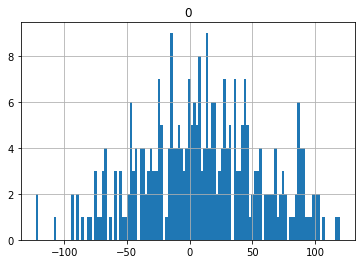

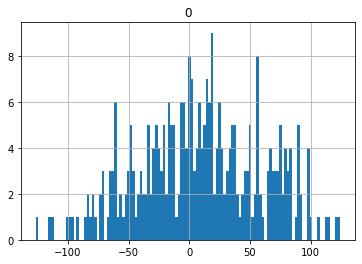

In [10]:
# pd.DataFrame(A).hist(bins=120)
# pd.DataFrame(B).hist(bins=120)

<AxesSubplot:>

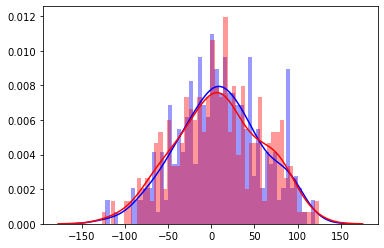

In [18]:
sns.distplot(A, bins=50, color='blue')
sns.distplot(B, bins=50, color='red')

Чтобы в результате теста получилось, что мы принимаем альтернативную гипотезу, надо чтобы уровень значимости былбольше, чем полученное p-value

In [20]:
alpha = 0.7400341626811638
result = stats.ttest_ind(A, B, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средние выборок различны => есть значимая разница эффективности препаратов')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)
Отвергаем нулевую гипотезу, средние выборок различны => есть значимая разница эффективности препаратов


Но такое значение alpha слишком велико, чтобы имело смысл применения в подобных рода задачах